# BIFET verification example_light_ADxx

In example ADxx

we propose a pure time-independent diffusion testing case with (n+1) dimension setting

the PDE equation reads

$\nabla_\mathbf{x}\cdot (\mathcal{C}_\mathbf{xx} u - \mathcal{D}_\mathbf{xx}\nabla_\mathbf{x} u) = f(\mathbf{x})$

we apply homogeneous Dirichlet boundary condition in $\mathbf{x}$ domain

$u = 0$, $\mathbf{x}\in\Omega^+_x$

and Neumann boundary

$(\mathcal{C}_\mathbf{xx} - \mathcal{D}_\mathbf{xx}\nabla_\mathbf{x}) u = 0$, $\mathbf{x}\in\Omega^-_x$

By imposing an analytical source

$u(\xi) = (\frac{\exp\{\xi_{min}-\xi\}}{(D_\xi + a_\xi)} - \frac{1}{a_\xi})\exp\{\frac{c_\xi(\xi-\xi_{max})}{D_\xi}\} - \frac{\exp\{\xi_{min}-\xi\}}{(D_\xi+c_\xi)} + \frac{1}{a_\xi}$ where $\xi\in\{\mathbf{x}\}$

we can derive $f(\mathbf{x})$ manually from $u(\mathbf{x}) = \prod_\xi u(\xi)$

here we present comparison and relative error estimation between analytical and numerical solutions

* $\xi_{min} = 0$, $\xi_{max} = 1$
* $D_{00} = \alpha$
* $D_{11} = \beta$
* $D_{22} = \beta$
* $a_{0} = a_z$
* $a_{1} = a_x$
* $a_{2} = a_y$

the final L2 errors are estimated internally with deal.II functions

## 1. time-independent solver

### case 1.
$\alpha = \beta = a_z = a_x = a_y = 1$

Populating the interactive namespace from numpy and matplotlib


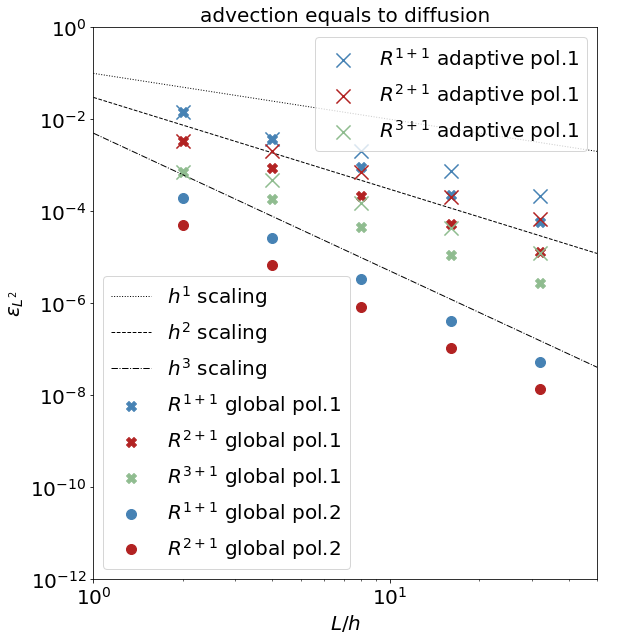

In [1]:
%pylab inline
import matplotlib.pyplot as plt

# dim 1+1
# refine global
# pol. 1
e_1d_rg1 = array(matrix('0    0.01467;\
1    0.00366364;\
2    0.000915707;\
3    0.000228915;\
4    5.72279e-05'))

# dim 1+1
# refine adaptive
# pol. 1
e_1d_ra1 = array(matrix('0    0.01467;\
1    0.00366364;\
2    0.00203493;\
3    0.000740963;\
4    0.000219701'))

# dim 1+1
# refine global
# pol. 2
e_1d_rg2 = array(matrix('0    0.000196502;\
1    2.61837e-05;\
2    3.32276e-06;\
3    4.16895e-07;\
4    5.21602e-08'))

# error list copied from Dxxtrial output

# dim 2+1
# refine global
# pol. 1
e_2d_rg1 = array(matrix('0    0.00342727;\
1    0.000852094;\
2    0.000212606;\
3    5.31236e-05;\
4    1.32791e-05'))


# dim 2+1
# refine adaptive
# pol. 1
e_2d_ra1 = array(matrix('0    0.00342727;\
1    0.00199801;\
2    0.000698289;\
3    0.000200503;\
4    6.8894e-05'))


# dim 2+1
# refine global
# pol. 2
e_2d_rg2 = array(matrix('0    4.91368e-05;\
1    6.63558e-06;\
2    8.44809e-07;\
3    1.06081e-07;\
4    1.32751e-08'))

# error list copied from Dxxtrial output

# dim 3+1
# refine adaptive
# pol. 1
e_3d_ra1 = array(matrix('0    0.000730595;\
1    0.000469298;\
2    0.000153486;\
3    4.35903e-05;\
4    1.20391e-05'))

e_3d_rg1 = array(matrix('0    0.000730595;\
1    0.000180668;\
2    4.49822e-05;\
3    1.1233e-05;\
4    2.80745e-06'))

fig1, ax1 = plt.subplots(figsize=(9,9))

g1 = ax1.scatter(2**(e_1d_rg1[:,0]+1),e_1d_rg1[:,1],marker='X',s=100,c='steelblue',label='$R^{1+1}$ global pol.1')
g2 = ax1.scatter(2**(e_2d_rg1[:,0]+1),e_2d_rg1[:,1],marker='X',s=100,c='firebrick',label='$R^{2+1}$ global pol.1')
g3 = ax1.scatter(2**(e_3d_rg1[:,0]+1),e_3d_rg1[:,1],marker='X',s=100,c='darkseagreen',label='$R^{3+1}$ global pol.1')

g12 = ax1.scatter(2**(e_1d_rg2[:,0]+1),e_1d_rg2[:,1],marker='o',s=100,c='steelblue',label='$R^{1+1}$ global pol.2')
g22 = ax1.scatter(2**(e_2d_rg2[:,0]+1),e_2d_rg2[:,1],marker='o',s=100,c='firebrick',label='$R^{2+1}$ global pol.2')

x0 = linspace(1,300,20)
l1 = ax1.plot(x0,0.1/x0**1,'k:',linewidth=1,label='$h^{1}$ scaling')
l2 = ax1.plot(x0,0.03/x0**2,'k--',linewidth=1,label='$h^{2}$ scaling')
l3 = ax1.plot(x0,0.005/x0**3,'k-.',linewidth=1,label='$h^{3}$ scaling')
ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')
ax1.set_title('advection equals to diffusion', fontsize='20')
ax1.tick_params(axis='both', which='major', labelsize='20')

ax1.legend(loc=3,fontsize='20')
ax1.set_xlim((1,50))
ax1.set_ylim((1.e-12,1))
ax1.set_xlabel('$L/h$',fontsize='20')
ax1.set_ylabel('$\epsilon_{L^2}$',fontsize='20')

ax2 = ax1.twinx()
a1 = ax2.scatter(2**(e_1d_ra1[:,0]+1),e_1d_ra1[:,1],marker='x',s=200,c='steelblue',label='$R^{1+1}$ adaptive pol.1')
a2 = ax2.scatter(2**(e_2d_ra1[:,0]+1),e_2d_ra1[:,1],marker='x',s=200,c='firebrick',label='$R^{2+1}$ adaptive pol.1')
a3 = ax2.scatter(2**(e_3d_ra1[:,0]+1),e_3d_ra1[:,1],marker='x',s=200,c='darkseagreen',label='$R^{3+1}$ adaptive pol.1')
ax2.set_yscale('log', nonposy='clip')
ax2.set_ylim((1.e-12,1))
ax2.legend(loc=1,fontsize='20')
plt.axis('off')

fig1.tight_layout()

savefig('ADxx_err1.pdf')

### case 2.
$\alpha = \beta = 0.05$

$a_z = a_x = a_y = 1$

which means advection is dominating

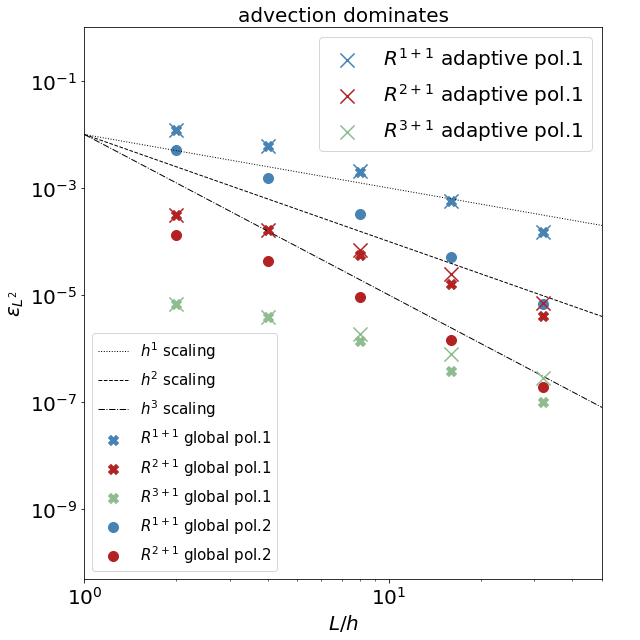

In [2]:
%pylab inline
import matplotlib.pyplot as plt

# dim 1+1
# refine global
# pol. 1
e_1d_rg1 = array(matrix('0    0.0121833;\
1    0.0060013;\
2    0.00203381;\
3    0.000571293;\
4    0.000147747'))

# dim 1+1
# refine adaptive
# pol. 1
e_1d_ra1 = array(matrix('0    0.0121833;\
1    0.0060013;\
2    0.00203531;\
3    0.000571754;\
4    0.000148854'))

# dim 1+1
# refine global
# pol. 2
e_1d_rg2 = array(matrix('0    0.0050801;\
1    0.00156381;\
2    0.000327968;\
3    5.07263e-05;\
4    6.76727e-06'))

# error list copied from Dxxtrial output

# dim 2+1
# refine global
# pol. 1
e_2d_rg1 = array(matrix('0    0.000310049;\
1    0.000164256;\
2    5.70975e-05;\
3    1.60444e-05;\
4    4.14388e-06'))


# dim 2+1
# refine adaptive
# pol. 1
e_2d_ra1 = array(matrix('0    0.000310049;\
1    0.000165333;\
2    6.8237e-05;\
3    2.52903e-05;\
4    7.04619e-06'))


# dim 2+1
# refine global
# pol. 2
e_2d_rg2 = array(matrix('0    0.000134061;\
1    4.30454e-05;\
2    9.15328e-06;\
3    1.42177e-06;\
4    1.8991e-07'))

# error list copied from Dxxtrial output

# dim 3+1
# refine adaptive
# pol. 1
e_3d_ra1 = array(matrix('0    6.82644e-06;\
1    3.89493e-06;\
2    1.85483e-06;\
3    7.90739e-07;\
4    2.88236e-07'))

e_3d_rg1 = array(matrix('0    6.82644e-06;\
1    3.8918e-06;\
2    1.38484e-06;\
3    3.89549e-07;\
4    1.00496e-07'))

fig1, ax1 = plt.subplots(figsize=(9,9))

g1 = ax1.scatter(2**(e_1d_rg1[:,0]+1),e_1d_rg1[:,1],marker='X',s=100,c='steelblue',label='$R^{1+1}$ global pol.1')
g2 = ax1.scatter(2**(e_2d_rg1[:,0]+1),e_2d_rg1[:,1],marker='X',s=100,c='firebrick',label='$R^{2+1}$ global pol.1')
g3 = ax1.scatter(2**(e_3d_rg1[:,0]+1),e_3d_rg1[:,1],marker='X',s=100,c='darkseagreen',label='$R^{3+1}$ global pol.1')

g12 = ax1.scatter(2**(e_1d_rg2[:,0]+1),e_1d_rg2[:,1],marker='o',s=100,c='steelblue',label='$R^{1+1}$ global pol.2')
g22 = ax1.scatter(2**(e_2d_rg2[:,0]+1),e_2d_rg2[:,1],marker='o',s=100,c='firebrick',label='$R^{2+1}$ global pol.2')

x0 = linspace(1,300,20)
l1 = ax1.plot(x0,0.01/x0**1,'k:',linewidth=1,label='$h^{1}$ scaling')
l2 = ax1.plot(x0,0.01/x0**2,'k--',linewidth=1,label='$h^{2}$ scaling')
l3 = ax1.plot(x0,0.01/x0**3,'k-.',linewidth=1,label='$h^{3}$ scaling')
ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')
ax1.set_title('advection dominates', fontsize='20')
ax1.tick_params(axis='both', which='major', labelsize='20')

ax1.legend(loc=3,fontsize='15')
ax1.set_xlim((1,50))
ax1.set_ylim((5.e-11,1))
ax1.set_xlabel('$L/h$',fontsize='20')
ax1.set_ylabel('$\epsilon_{L^2}$',fontsize='20')

ax2 = ax1.twinx()
a1 = ax2.scatter(2**(e_1d_ra1[:,0]+1),e_1d_ra1[:,1],marker='x',s=200,c='steelblue',label='$R^{1+1}$ adaptive pol.1')
a2 = ax2.scatter(2**(e_2d_ra1[:,0]+1),e_2d_ra1[:,1],marker='x',s=200,c='firebrick',label='$R^{2+1}$ adaptive pol.1')
a3 = ax2.scatter(2**(e_3d_ra1[:,0]+1),e_3d_ra1[:,1],marker='x',s=200,c='darkseagreen',label='$R^{3+1}$ adaptive pol.1')
ax2.set_yscale('log', nonposy='clip')
ax2.set_ylim((5.e-11,1))
ax2.legend(loc=1,fontsize='20')
plt.axis('off')

fig1.tight_layout()

savefig('ADxx_err2.pdf')

## 2. time-dependent solver

#### fixed time difference (evolution check)

Populating the interactive namespace from numpy and matplotlib
[ 2.02044069  2.00508534  2.00126984  2.00031737  2.00007934]


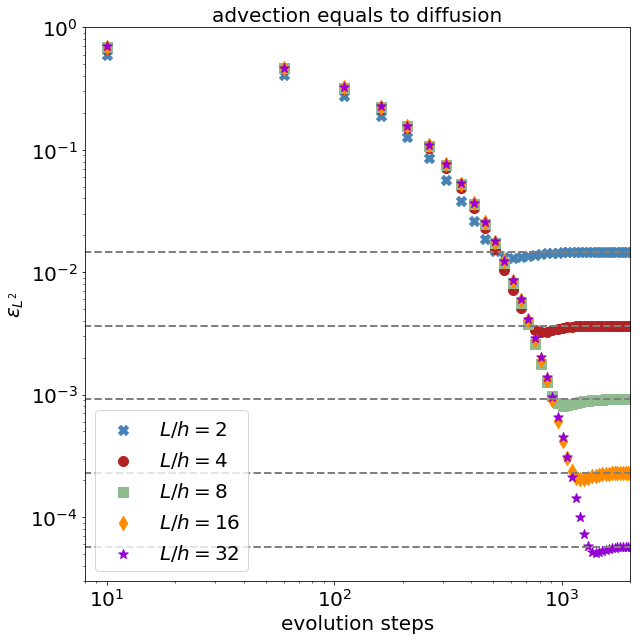

In [3]:
%pylab inline
import matplotlib.pyplot as plt

err_lv0 = array(matrix('10	0.596249;\
60	0.406476;\
110	0.276333;\
160	0.187314;\
210	0.126495;\
260	0.0850443;\
310	0.0569514;\
360	0.0381603;\
410	0.0259781;\
460	0.0186324;\
510	0.0148299;\
560	0.0133536;\
610	0.0130827;\
660	0.0132757;\
710	0.0135796;\
760	0.0138632;\
810	0.0140906;\
860	0.014261;\
910	0.0143844;\
960	0.0144719;\
1010	0.0145332;\
1060	0.0145758;\
1110	0.0146052;\
1160	0.0146255;\
1210	0.0146395;\
1260	0.0146491;\
1310	0.0146557;\
1360	0.0146602;\
1410	0.0146633;\
1460	0.0146654;\
1510	0.0146669;\
1560	0.0146678;\
1610	0.0146685;\
1660	0.014669;\
1710	0.0146693;\
1760	0.0146695;\
1810	0.0146697;\
1860	0.0146698;\
1910	0.0146699;\
1960	0.0146699;\
2010	0.0146699;\
2060	0.01467'))

err_lv1 = array(matrix('10	0.668591;\
60	0.453481;\
110	0.31338;\
160	0.216748;\
210	0.149786;\
260	0.103366;\
310	0.0711917;\
360	0.0489;\
410	0.0334698;\
460	0.0228104;\
510	0.0154799;\
560	0.0104901;\
610	0.00717356;\
660	0.00508676;\
710	0.00391961;\
760	0.00339854;\
810	0.00325221;\
860	0.00327191;\
910	0.00334376;\
960	0.00341995;\
1010	0.00348463;\
1060	0.00353486;\
1110	0.00357217;\
1160	0.00359918;\
1210	0.00361846;\
1260	0.00363208;\
1310	0.00364164;\
1360	0.00364833;\
1410	0.003653;\
1460	0.00365625;\
1510	0.00365851;\
1560	0.00366008;\
1610	0.00366117;\
1660	0.00366193;\
1710	0.00366245;\
1760	0.00366281;\
1810	0.00366307;\
1860	0.00366324;\
1910	0.00366336;\
1960	0.00366345;\
2010	0.00366351;\
2060	0.00366355'))

err_lv2 = array(matrix('10	0.691237;\
60	0.465155;\
110	0.322372;\
160	0.223968;\
210	0.155613;\
260	0.108086;\
310	0.0750365;\
360	0.0520546;\
410	0.0360742;\
460	0.0249634;\
510	0.0172399;\
560	0.0118734;\
610	0.00814827;\
660	0.00556781;\
710	0.00378859;\
760	0.00257474;\
810	0.0017666;\
860	0.00125778;\
910	0.000973418;\
960	0.000846775;\
1010	0.000811551;\
1060	0.000816866;\
1110	0.000834935;\
1160	0.000854046;\
1210	0.000870296;\
1260	0.000882947;\
1310	0.000892369;\
1360	0.000899213;\
1410	0.000904111;\
1460	0.000907583;\
1510	0.000910028;\
1560	0.000911744;\
1610	0.000912944;\
1660	0.000913783;\
1710	0.000914367;\
1760	0.000914774;\
1810	0.000915058;\
1860	0.000915256;\
1910	0.000915393;\
1960	0.000915489;\
2010	0.000915555;\
2060	0.000915601'))

err_lv3 = array(matrix('10	0.697443;\
60	0.467995;\
110	0.324542;\
160	0.225717;\
210	0.157036;\
260	0.109248;\
310	0.0759938;\
360	0.0528521;\
410	0.0367478;\
460	0.0255409;\
510	0.0177421;\
560	0.0123152;\
610	0.00853901;\
660	0.00591168;\
710	0.00408413;\
760	0.00281353;\
810	0.00193108;\
860	0.00131964;\
910	0.00089816;\
960	0.000611045;\
1010	0.000420719;\
1060	0.000302133;\
1110	0.000237271;\
1160	0.000209513;\
1210	0.000202608;\
1260	0.000204625;\
1310	0.000209284;\
1360	0.000214006;\
1410	0.000217963;\
1460	0.000221024;\
1510	0.000223296;\
1560	0.000224944;\
1610	0.000226122;\
1660	0.000226958;\
1710	0.000227546;\
1760	0.000227959;\
1810	0.000228248;\
1860	0.00022845;\
1910	0.000228591;\
1960	0.000228689;\
2010	0.000228758;\
2060	0.000228805'))

err_lv4 = array(matrix('10	0.699022;\
60	0.46869;\
110	0.325072;\
160	0.226146;\
210	0.157385;\
260	0.109535;\
310	0.0762311;\
360	0.0530507;\
410	0.0369165;\
460	0.0256868;\
510	0.0178706;\
560	0.0124303;\
610	0.00864379;\
660	0.0060083;\
710	0.00417398;\
760	0.00289732;\
810	0.00200883;\
860	0.00139057;\
910	0.000960455;\
960	0.000661405;\
1010	0.00045373;\
1060	0.000309892;\
1110	0.000210856;\
1160	0.000143583;\
1210	9.92899e-05;\
1260	7.2107e-05;\
1310	5.76788e-05;\
1360	5.18393e-05;\
1410	5.06337e-05;\
1460	5.13184e-05;\
1510	5.25133e-05;\
1560	5.36708e-05;\
1610	5.46244e-05;\
1660	5.53559e-05;\
1710	5.58967e-05;\
1760	5.62879e-05;\
1810	5.65672e-05;\
1860	5.67649e-05;\
1910	5.69042e-05;\
1960	5.70019e-05;\
2010	5.70702e-05;\
2060	5.7118e-05'))

# dim 1+1
# refine global
# pol. 1
e_1d_rg1 = array(matrix('0    0.01467;\
1    0.00366364;\
2    0.000915707;\
3    0.000228915;\
4    5.72279e-05'))

print (2**(e_1d_rg1[:,1]+1))

fig1, ax1 = plt.subplots(figsize=(9,9))

l0 = ax1.plot((0,2000),(e_1d_rg1[0,1],e_1d_rg1[0,1]),color='grey',linestyle='--',linewidth=2)
l1 = ax1.plot((0,2000),(e_1d_rg1[1,1],e_1d_rg1[1,1]),color='grey',linestyle='--',linewidth=2)
l2 = ax1.plot((0,2000),(e_1d_rg1[2,1],e_1d_rg1[2,1]),color='grey',linestyle='--',linewidth=2)
l3 = ax1.plot((0,2000),(e_1d_rg1[3,1],e_1d_rg1[3,1]),color='grey',linestyle='--',linewidth=2)
l4 = ax1.plot((0,2000),(e_1d_rg1[4,1],e_1d_rg1[4,1]),color='grey',linestyle='--',linewidth=2)

c0 = ax1.scatter (err_lv0[:,0],err_lv0[:,1],marker='X',s=100,c='steelblue',label='$L/h = 2$')
c1 = ax1.scatter (err_lv1[:,0],err_lv1[:,1],marker='o',s=100,c='firebrick',label='$L/h = 4$')
c2 = ax1.scatter (err_lv2[:,0],err_lv2[:,1],marker='s',s=100,c='darkseagreen',label='$L/h = 8$')
c3 = ax1.scatter (err_lv3[:,0],err_lv3[:,1],marker='d',s=100,c='darkorange',label='$L/h = 16$')
c4 = ax1.scatter (err_lv4[:,0],err_lv4[:,1],marker='*',s=100,c='darkviolet',label='$L/h = 32$')
ax1.legend(loc=3,fontsize='20')
ax1.set_xlim((8,2000))
ax1.set_ylim((0.00003,1))
ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')
ax1.set_xlabel('evolution steps',fontsize='20')
ax1.set_ylabel('$\epsilon_{L^2}$',fontsize='20')
ax1.tick_params(axis='both', which='major', labelsize='20')
ax1.set_title('advection equals to diffusion', fontsize='20')

fig1.tight_layout()

savefig('ADxx_evo.pdf')

#### fixed total time (convergence check)

Populating the interactive namespace from numpy and matplotlib
[ 2.02044069  2.00508534  2.00126984  2.00031737  2.00007934]


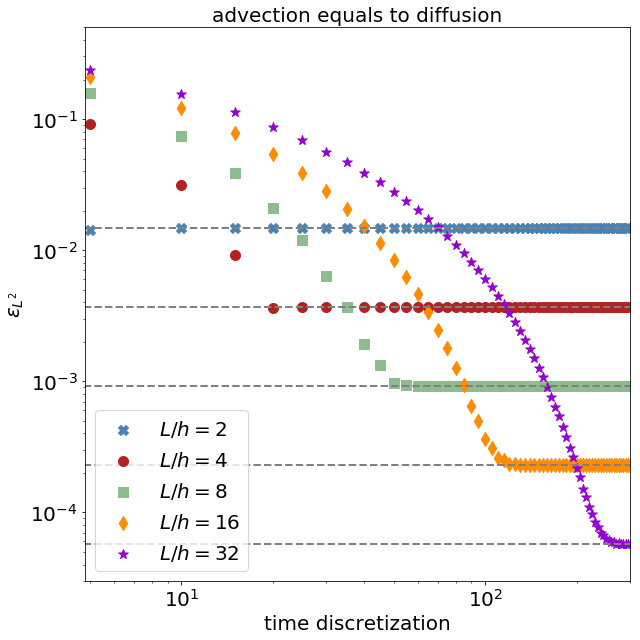

In [4]:
%pylab inline
import matplotlib.pyplot as plt

err_lv0 = array(matrix('5       0.0143533;\
10      0.0147698;\
15      0.0146674;\
20      0.01467;\
25      0.01467;\
30      0.01467;\
35      0.01467;\
40      0.01467;\
45      0.01467;\
50      0.01467;\
55      0.01467;\
60      0.01467;\
65      0.01467;\
70      0.01467;\
75      0.01467;\
80      0.01467;\
85      0.01467;\
90      0.01467;\
95      0.01467;\
100     0.01467;\
105     0.01467;\
110     0.01467;\
115     0.01467;\
120     0.01467;\
125     0.01467;\
130     0.01467;\
135     0.01467;\
140     0.01467;\
145     0.01467;\
150     0.01467;\
155     0.01467;\
160     0.01467;\
165     0.01467;\
170     0.01467;\
175     0.01467;\
180     0.01467;\
185     0.01467;\
190     0.01467;\
195     0.01467;\
200     0.01467;\
205     0.01467;\
210     0.01467;\
215     0.01467;\
220     0.01467;\
225     0.01467;\
230     0.01467;\
235     0.01467;\
240     0.01467;\
245     0.01467;\
250     0.01467;\
255     0.01467;\
260     0.01467;\
265     0.01467;\
270     0.01467;\
275     0.01467;\
280     0.01467;\
285     0.01467;\
290     0.01467;\
295     0.01467'))

err_lv1 = array(matrix('5       0.0924474;\
10      0.0315045;\
15      0.00913698;\
20      0.00359526;\
25      0.00368429;\
30      0.0036621;\
35      0.00366375;\
40      0.00366356;\
45      0.00366358;\
50      0.00366358;\
55      0.00366358;\
60      0.00366358;\
65      0.00366357;\
70      0.00366357;\
75      0.00366357;\
80      0.00366357;\
85      0.00366357;\
90      0.00366357;\
95      0.00366357;\
100     0.00366357;\
105     0.00366357;\
110     0.00366357;\
115     0.00366357;\
120     0.00366357;\
125     0.00366357;\
130     0.00366357;\
135     0.00366357;\
140     0.00366357;\
145     0.00366357;\
150     0.00366357;\
155     0.00366357;\
160     0.00366357;\
165     0.00366357;\
170     0.00366357;\
175     0.00366357;\
180     0.00366357;\
185     0.00366357;\
190     0.00366357;\
195     0.00366357;\
200     0.00366357;\
205     0.00366357;\
210     0.00366357;\
215     0.00366357;\
220     0.00366357;\
225     0.00366357;\
230     0.00366357;\
235     0.00366357;\
240     0.00366357;\
245     0.00366357;\
250     0.00366357;\
255     0.00366357;\
260     0.00366357;\
265     0.00366357;\
270     0.00366357;\
275     0.00366357;\
280     0.00366357;\
285     0.00366357;\
290     0.00366357;\
295     0.00366357'))

err_lv2 = array(matrix('5       0.159333;\
10      0.0745736;\
15      0.0387855;\
20      0.0211062;\
25      0.0118737;\
30      0.00634917;\
35      0.00366174;\
40      0.00193711;\
45      0.00132039;\
50      0.000975286;\
55      0.000943586;\
60      0.000913972;\
65      0.000917568;\
70      0.000915152;\
75      0.000915802;\
80      0.000915583;\
85      0.000915645;\
90      0.000915627;\
95      0.000915631;\
100     0.00091563;\
105     0.00091563;\
110     0.00091563;\
115     0.00091563;\
120     0.00091563;\
125     0.000915629;\
130     0.000915629;\
135     0.000915629;\
140     0.000915629;\
145     0.000915629;\
150     0.000915629;\
155     0.000915629;\
160     0.000915629;\
165     0.000915629;\
170     0.000915629;\
175     0.000915629;\
180     0.000915629;\
185     0.000915629;\
190     0.000915629;\
195     0.000915629;\
200     0.000915628;\
205     0.000915628;\
210     0.000915628;\
215     0.000915628;\
220     0.000915628;\
225     0.000915628;\
230     0.000915628;\
235     0.000915628;\
240     0.000915628;\
245     0.000915628;\
250     0.000915628;\
255     0.000915628;\
260     0.000915628;\
265     0.000915628;\
270     0.000915628;\
275     0.000915628;\
280     0.000915628;\
285     0.000915628;\
290     0.000915628;\
295     0.000915628'))

err_lv3 = array(matrix('5       0.208153;\
10      0.12037;\
15      0.0783045;\
20      0.0541199;\
25      0.0387241;\
30      0.0281232;\
35      0.0207696;\
40      0.0153265;\
45      0.0114287;\
50      0.0084336;\
55      0.00628208;\
60      0.00459025;\
65      0.00339781;\
70      0.00244215;\
75      0.00179617;\
80      0.0012661;\
85      0.000934173;\
90      0.000652185;\
95      0.000499858;\
100     0.000364756;\
105     0.000311182;\
110     0.000259894;\
115     0.000248796;\
120     0.000233749;\
125     0.000233212;\
130     0.000229207;\
135     0.000229815;\
140     0.000228722;\
145     0.000229074;\
150     0.00022876;\
155     0.000228899;\
160     0.000228805;\
165     0.000228852;\
170     0.000228825;\
175     0.000228839;\
180     0.000228831;\
185     0.000228835;\
190     0.000228833;\
195     0.000228834;\
200     0.000228833;\
205     0.000228834;\
210     0.000228833;\
215     0.000228833;\
220     0.000228833;\
225     0.000228833;\
230     0.000228833;\
235     0.000228833;\
240     0.000228833;\
245     0.000228833;\
250     0.000228833;\
255     0.000228833;\
260     0.000228833;\
265     0.000228833;\
270     0.000228833;\
275     0.000228833;\
280     0.000228833;\
285     0.000228833;\
290     0.000228833;\
295     0.000228833'))

err_lv4 = array(matrix('5       0.238119;\
10      0.154043;\
15      0.112184;\
20      0.0866898;\
25      0.0691981;\
30      0.056368;\
35      0.0466242;\
40      0.0389427;\
45      0.0328192;\
50      0.0277998;\
55      0.0236869;\
60      0.0202311;\
65      0.0173514;\
70      0.0148901;\
75      0.012818;\
80      0.011025;\
85      0.00950677;\
90      0.00818103;\
95      0.00705594;\
100     0.00606659;\
105     0.00522755;\
110     0.00448558;\
115     0.00385842;\
120     0.0033011;\
125     0.00283276;\
130     0.00241459;\
135     0.00206613;\
140     0.00175336;\
145     0.00149566;\
150     0.00126284;\
155     0.00107384;\
160     0.00090158;\
165     0.000764404;\
170     0.000637868;\
175     0.000539604;\
180     0.000447424;\
185     0.000378194;\
190     0.000311715;\
195     0.000264014;\
200     0.000216711;\
205     0.000184886;\
210     0.000151924;\
215     0.000131731;\
220     0.000109562;\
225     9.77503e-05;\
230     8.36847e-05;\
235     7.75956e-05;\
240     6.9354e-05;\
245     6.67323e-05;\
250     6.22747e-05;\
255     6.14098e-05;\
260     5.91282e-05;\
265     5.89868e-05;\
270     5.78456e-05;\
275     5.79328e-05;\
280     5.73615e-05;\
285     5.74844e-05;\
290     5.71946e-05;\
295     5.72945e-05'))

# dim 1+1
# refine global
# pol. 1
e_1d_rg1 = array(matrix('0    0.01467;\
1    0.00366364;\
2    0.000915707;\
3    0.000228915;\
4    5.72279e-05'))

print (2**(e_1d_rg1[:,1]+1))

fig1, ax1 = plt.subplots(figsize=(9,9))

l0 = ax1.plot((0,2000),(e_1d_rg1[0,1],e_1d_rg1[0,1]),color='grey',linestyle='--',linewidth=2)
l1 = ax1.plot((0,2000),(e_1d_rg1[1,1],e_1d_rg1[1,1]),color='grey',linestyle='--',linewidth=2)
l2 = ax1.plot((0,2000),(e_1d_rg1[2,1],e_1d_rg1[2,1]),color='grey',linestyle='--',linewidth=2)
l3 = ax1.plot((0,2000),(e_1d_rg1[3,1],e_1d_rg1[3,1]),color='grey',linestyle='--',linewidth=2)
l4 = ax1.plot((0,2000),(e_1d_rg1[4,1],e_1d_rg1[4,1]),color='grey',linestyle='--',linewidth=2)

c0 = ax1.scatter (err_lv0[:,0],err_lv0[:,1],marker='X',s=100,c='steelblue',label='$L/h = 2$')
c1 = ax1.scatter (err_lv1[:,0],err_lv1[:,1],marker='o',s=100,c='firebrick',label='$L/h = 4$')
c2 = ax1.scatter (err_lv2[:,0],err_lv2[:,1],marker='s',s=100,c='darkseagreen',label='$L/h = 8$')
c3 = ax1.scatter (err_lv3[:,0],err_lv3[:,1],marker='d',s=100,c='darkorange',label='$L/h = 16$')
c4 = ax1.scatter (err_lv4[:,0],err_lv4[:,1],marker='*',s=100,c='darkviolet',label='$L/h = 32$')
ax1.legend(loc=3,fontsize='20')
ax1.set_xlim((4.8,300))
ax1.set_ylim((0.00003,0.5))
ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')
ax1.set_xlabel('time discretization',fontsize='20')
ax1.set_ylabel('$\epsilon_{L^2}$',fontsize='20')
ax1.tick_params(axis='both', which='major', labelsize='20')
ax1.set_title('advection equals to diffusion', fontsize='20')

fig1.tight_layout()

savefig('ADxx_conv.pdf')

## execute the corresponding example and check if above figures can be recovered